<img src="https://seekvectorlogo.com/wp-content/uploads/2019/10/standard-bank-vector-logo.png" width="400" align="right"/>

# <div style="text-align: right"> <span style="color:blue"> Data Science Virtual Experience Programme</span> </div>
    
## Task 2 - Data Science With Python: Credit / Home Loans (AutoML vs Bespoke ML)


`Standard Bank` plans to leverage cutting-edge technologies to provide their clients with a full range of services through the comfort of their mobile devices as it embraces the wave of digital transformation. The bank, which is Africa's largest lender by assets, wants to enhance the present procedure for house loan applications. Home loan applications must currently be processed manually by loan officials. A decision on whether or not to give the applicant the loan for the required amount will be communicated to them after this procedure, which takes 2 to 3 days. By implementing a model that predicts whether a potential borrower will default on his or her loan or not, Standard Bank wants to use machine learning to evaluate an applicant's credit worthiness and streamline the process so that the applicant hears back right away after submitting their application.

To achieve the goal, we must adhere to the data science lifecycle.

### Library Imports:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss
import sweetviz 
import autosklearn.classification

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

### Datasets Imports:

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


# <center> PART ONE
---

The Home Loans Department manager wants to know the following analysis:


### DataFrame Spesific Exploratory Data Analysis

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
## concatenating the two datasets for easy analysis
n = train_data.shape[0]
df = pd.concat([train_data, test_data], axis=0) #the new combined dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [27]:
print("Number of cells in DataFrame: ", df.size)
print("----------------------------")
df.info()
print("----------------------------")
print("DataFrame Shape: ", df.shape)

Number of cells in DataFrame:  12753
----------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB
----------------------------
DataFrame Shape:

### Sweetviz's Automated Exploratory Data Analysis

Done! Use 'show' commands to display/save.   |██████████████████████████████████████████| [100%]   00:00 -> (00:00 left)



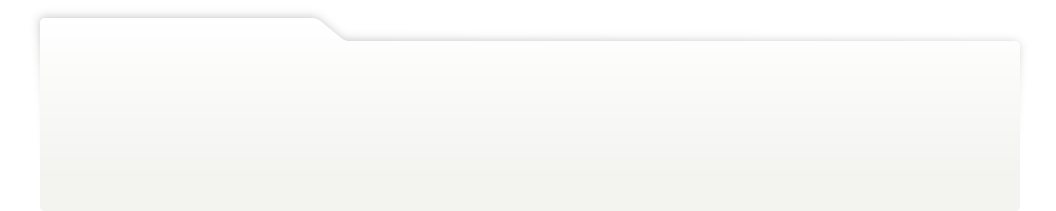
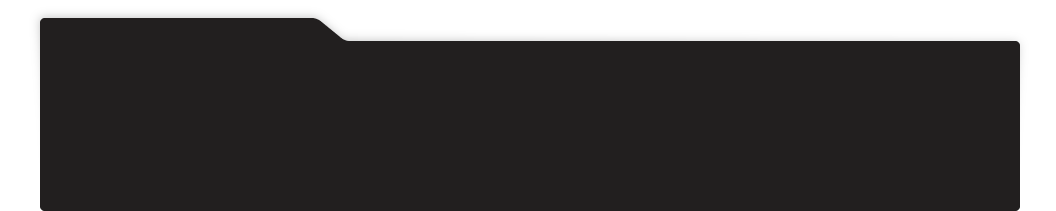
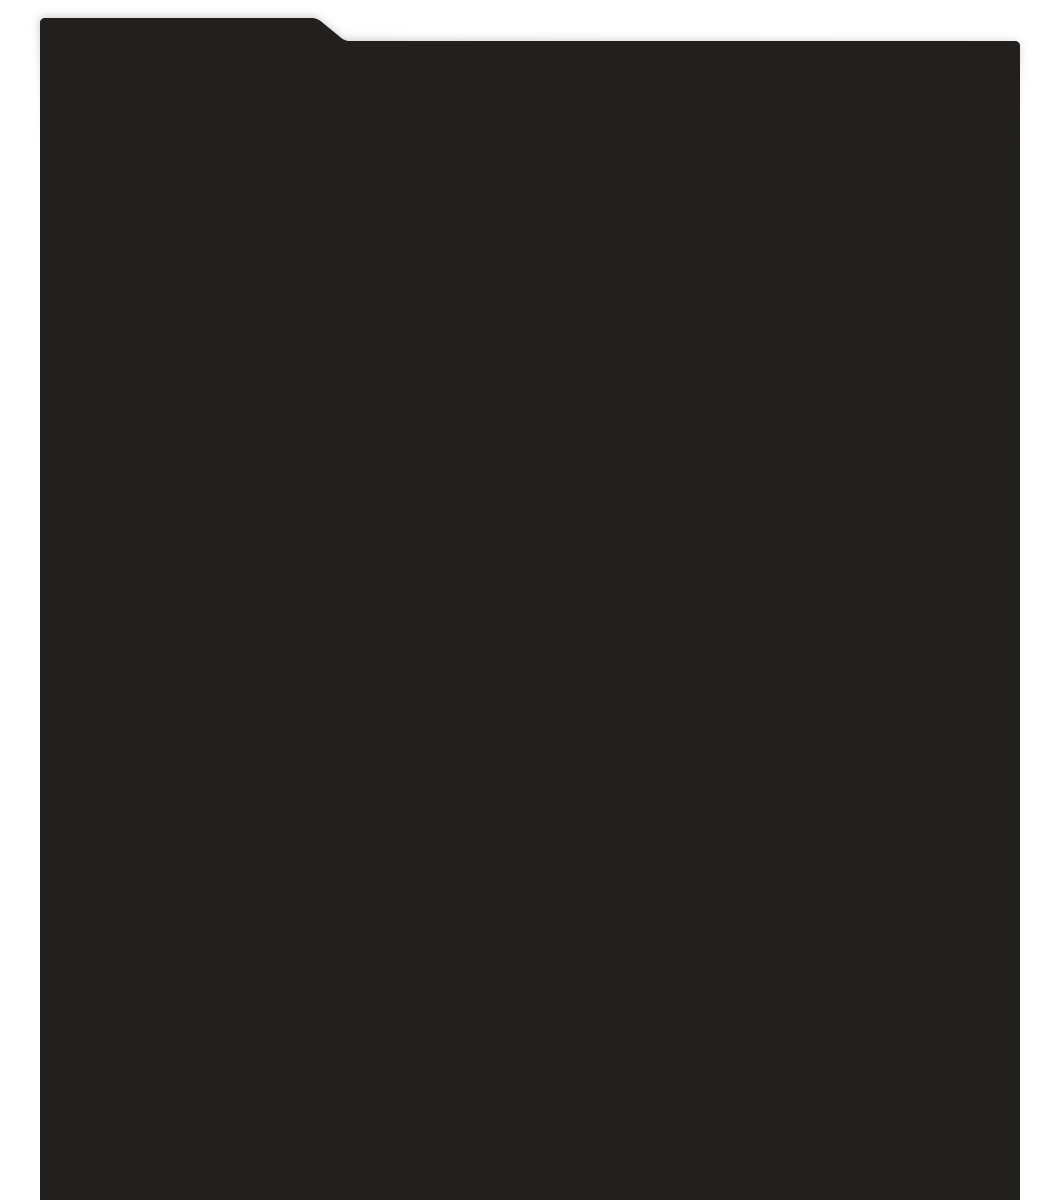
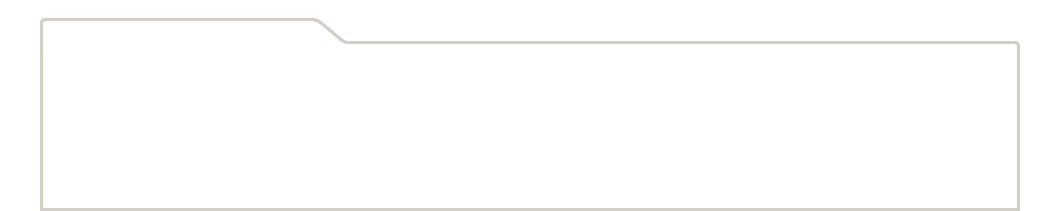
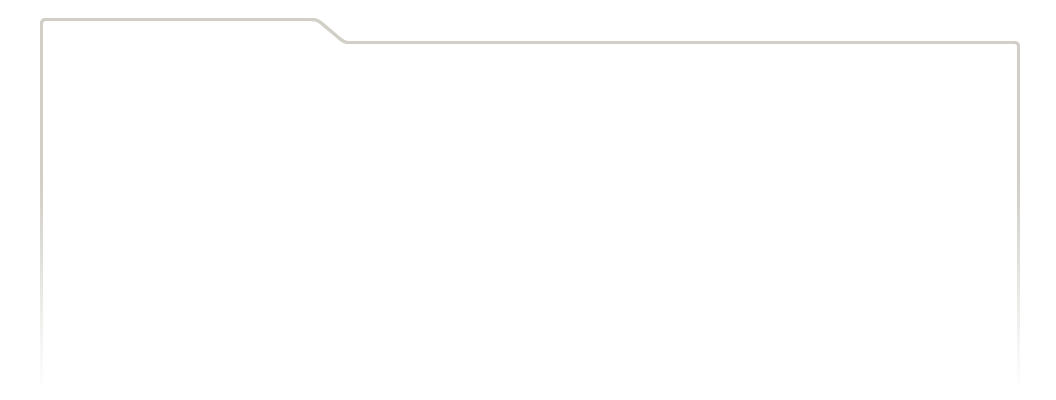
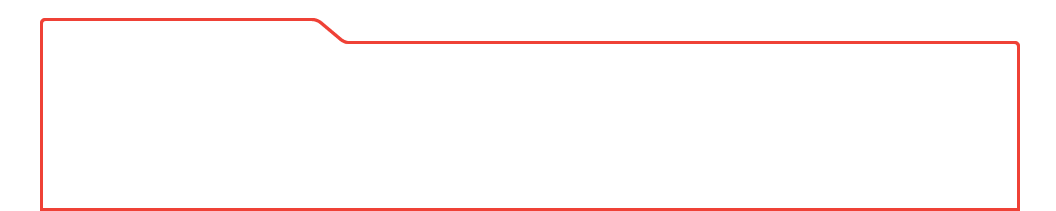
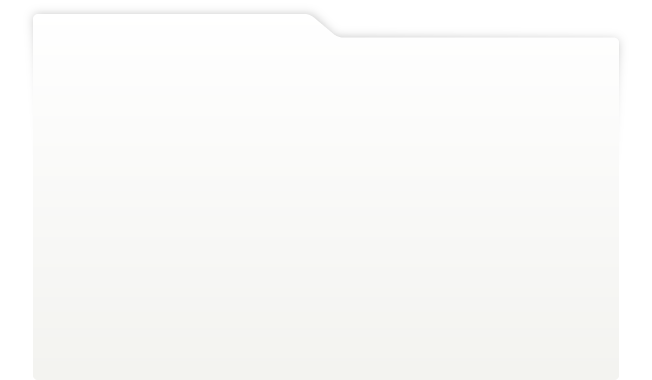
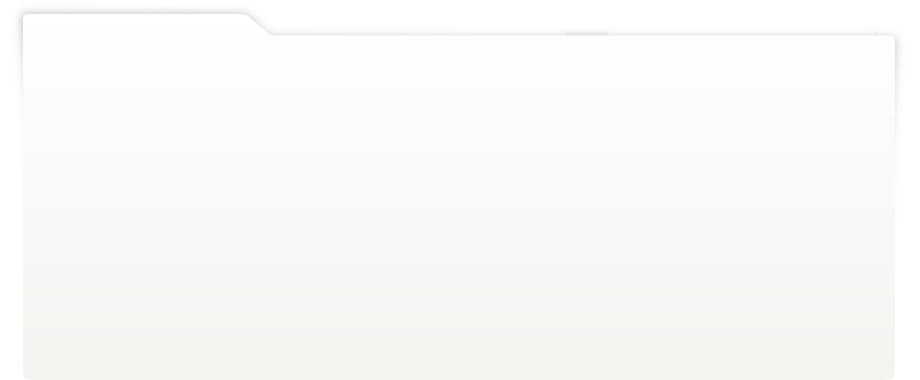
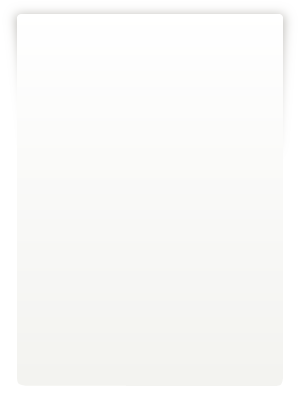
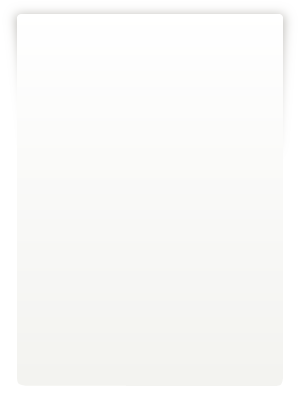
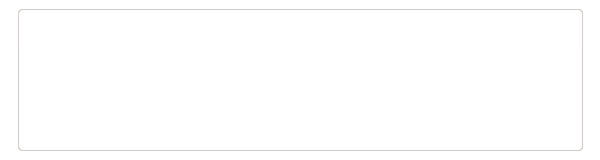
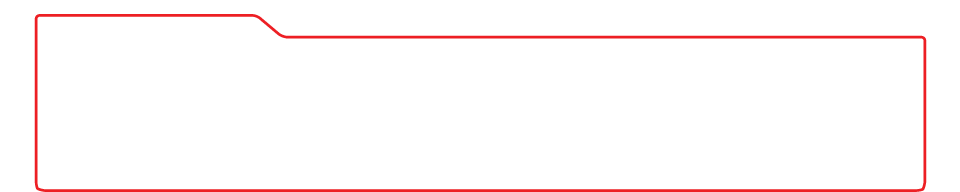
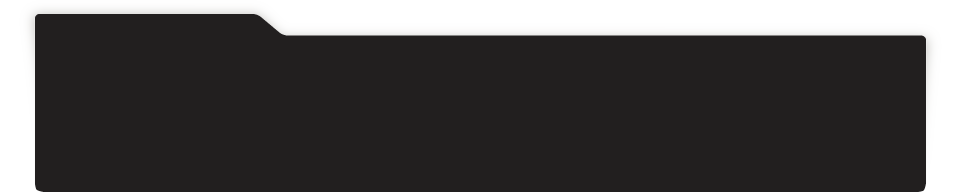
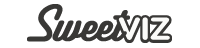
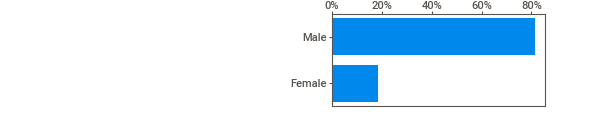
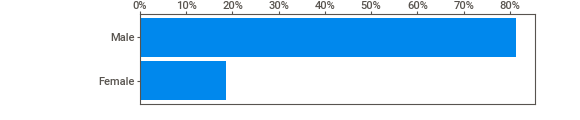
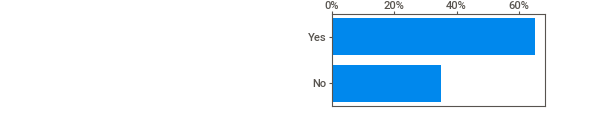
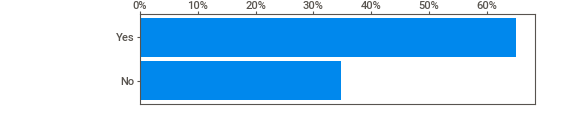
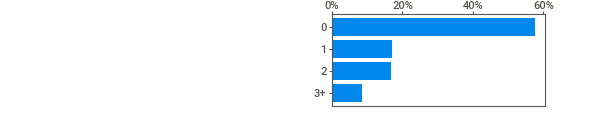
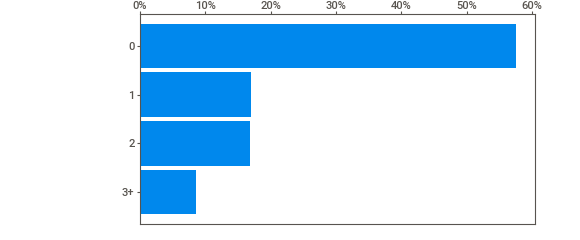
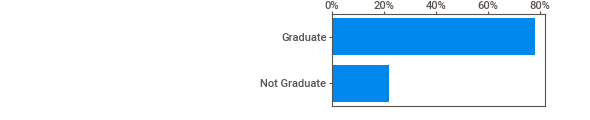
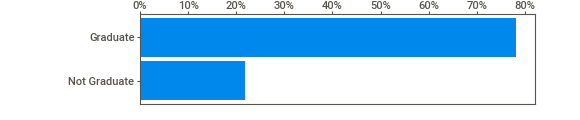
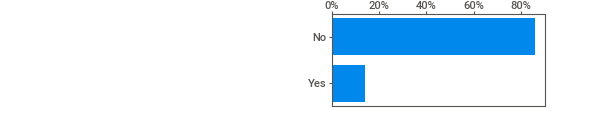
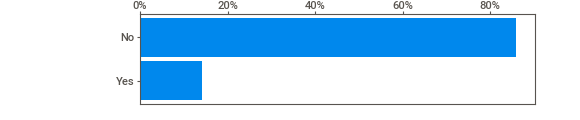
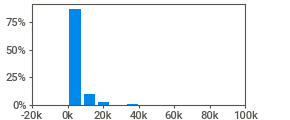
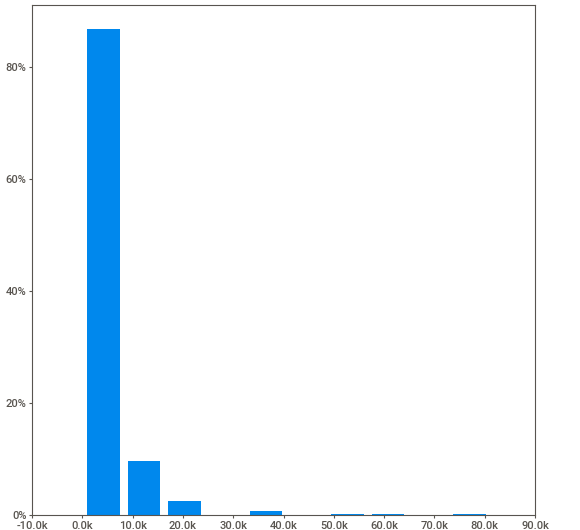
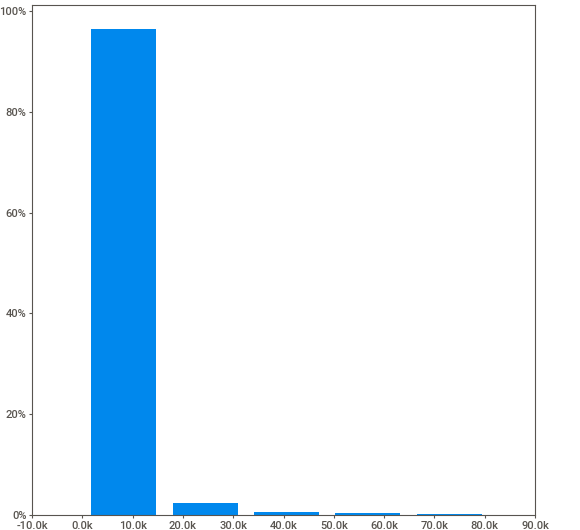
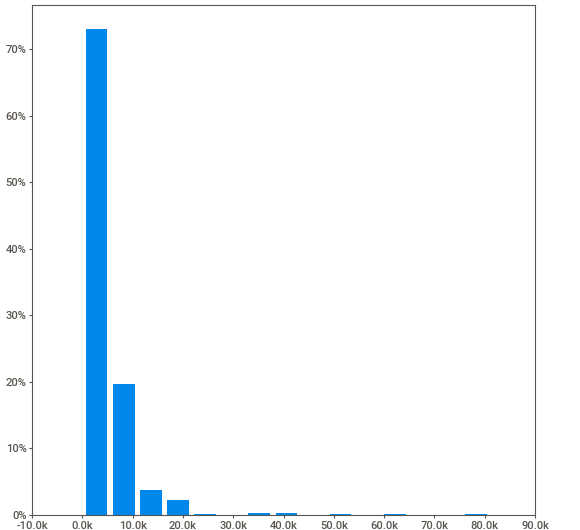
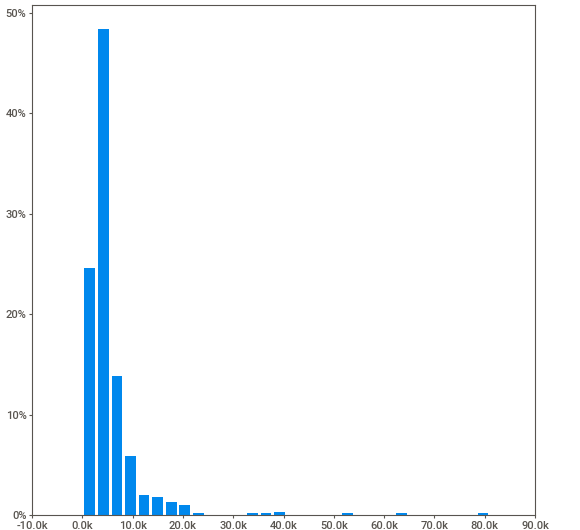
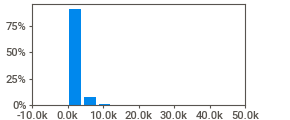
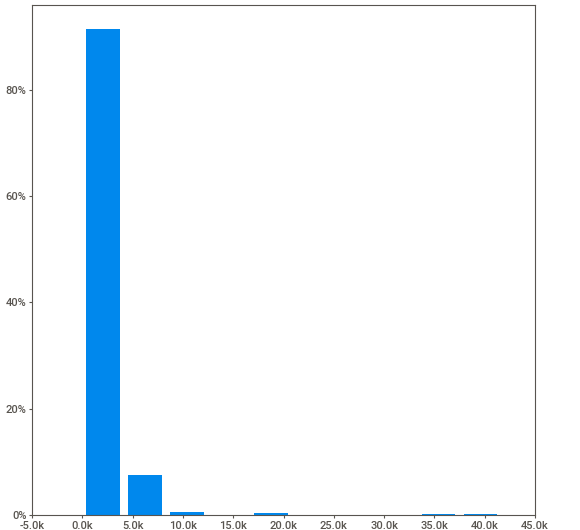
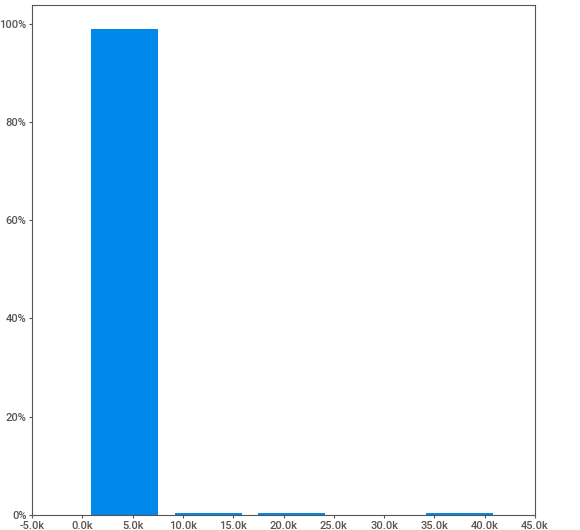
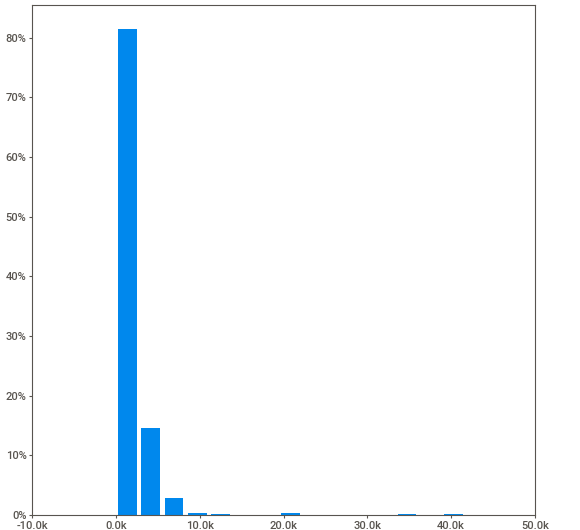
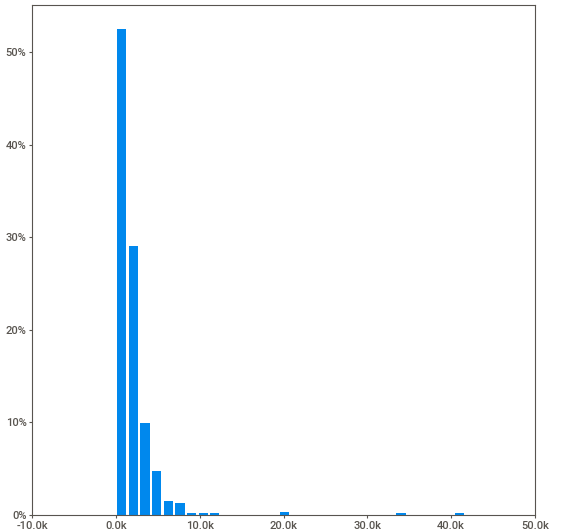
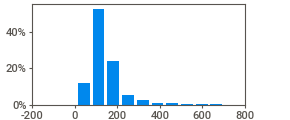
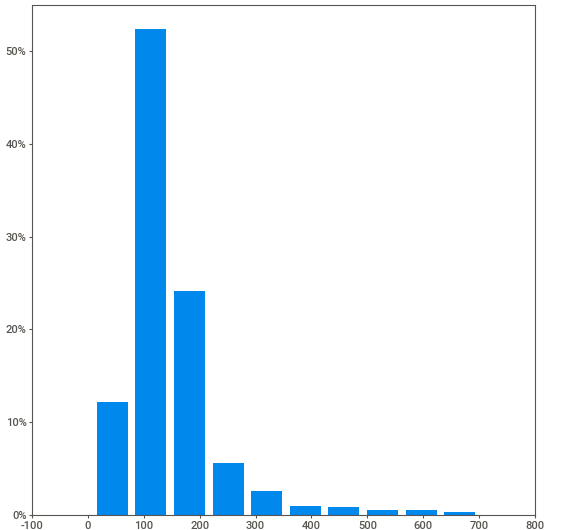
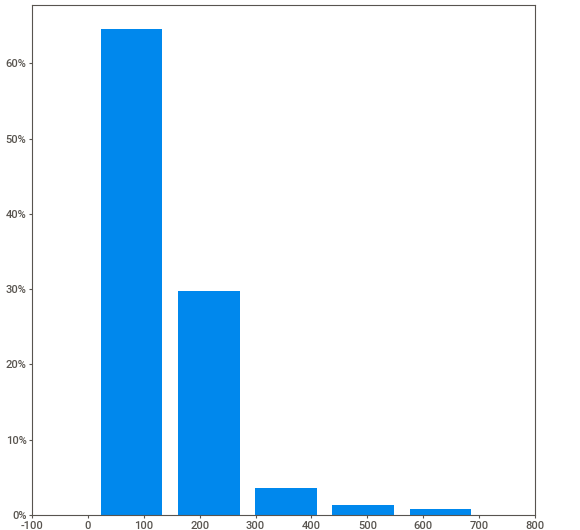
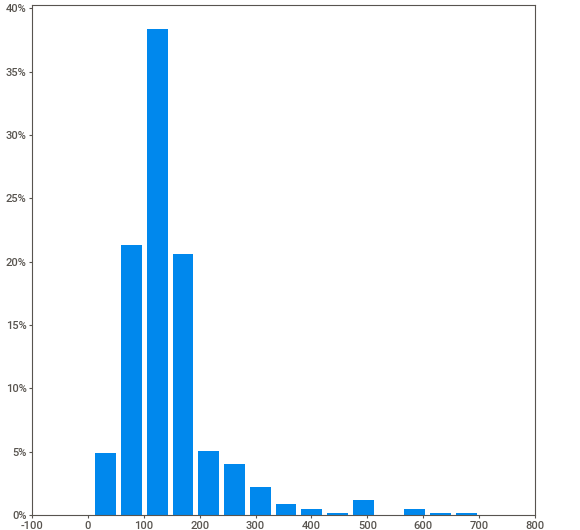
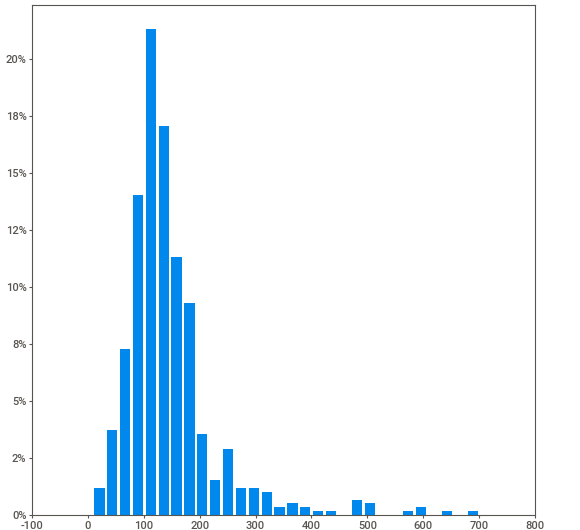
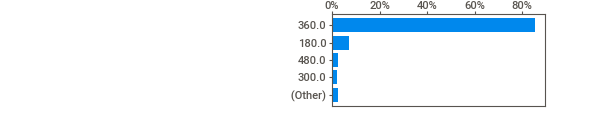
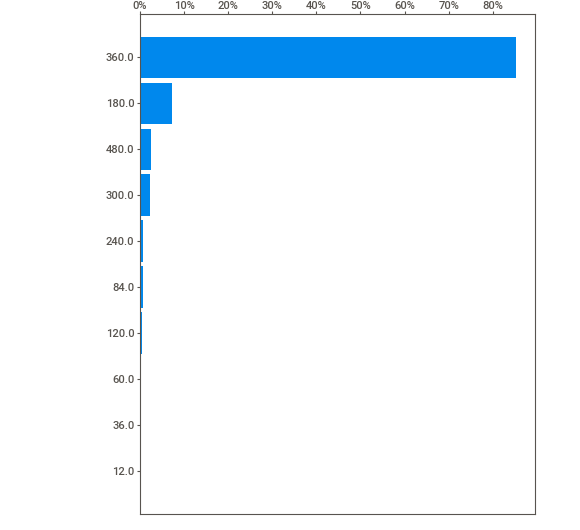
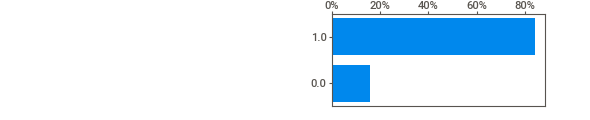
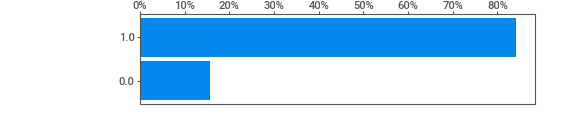
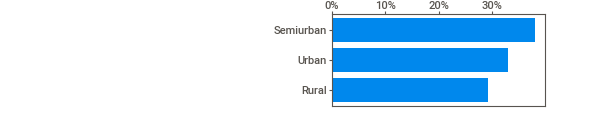
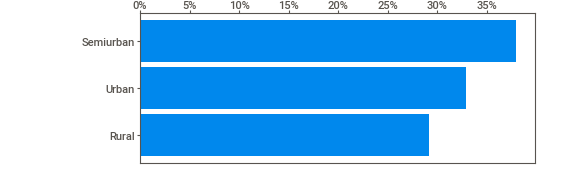
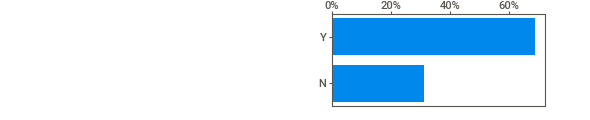
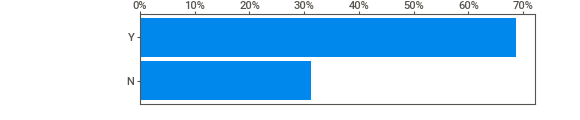
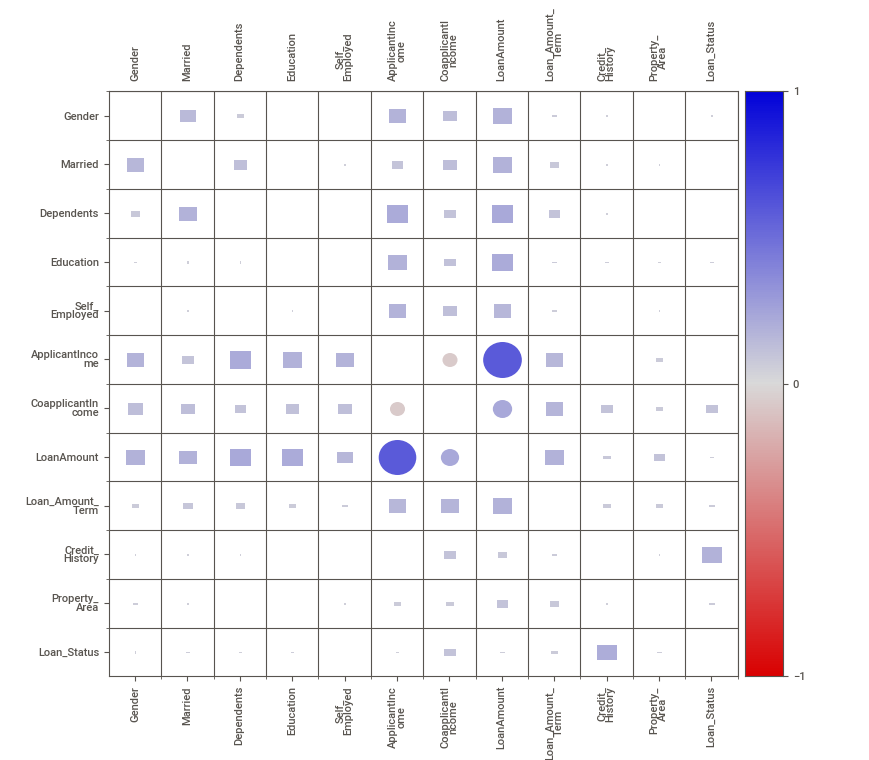
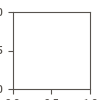

In [7]:
autoEDA = sweetviz.analyze(train_data)
autoEDA.show_notebook()

## <span style="color:blue"> Question 1:</span>
#### Provide a general overview of the data relating to number of records, fields and their data types

#### (a) The training dataset:

In [236]:
train_data.info() #General overview
print("------------------------------------")
print("DataFrame Shape: ", train_data.shape)
print("------------------------------------")
print(train_data["Gender"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
------------------------------------
DataFrame Shape:  (614, 13)
------------------------------------
Male      

In [24]:
train_data.describe(include=["int64","float64"]).T #Statistical overview of train dataset

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


#### (b) The test dataset:

In [237]:
test_data.info() #General overview
print("------------------------------------")
print("DataFrame Shape: ", test_data.shape)
print("------------------------------------")
print(test_data["Gender"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
------------------------------------
DataFrame Shape:  (367, 12)
------------------------------------
Male      286
Female     70
Name: Gender, dtype: int64


In [26]:
test_data.describe(include=["int64","float64"]).T #Statistical overview of train dataset

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,2864.00,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.00,1025.0,2430.5,24000.0
LoanAmount,362.0,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,342.537396,65.156643,6.0,360.00,360.0,360.0,480.0
Credit_History,338.0,0.825444,0.380150,0.0,1.00,1.0,1.0,1.0


#### Analysis of results obtained:

- Train Data contains 614 Rows and total 13 columns with 4 float columns, 1 integer column and 8 object columns. 
\
&nbsp;
- Test Data contains 367 Rows and total 12 columns with 3 float columns, 2 Integer columns and 7 object columns. Note that in this dataset the column Loan_Status is missing.

## <span style="color:blue"> Question 2:</span>

####  Data quality issues that exist in the train and test datasets with spesific focus on any missing values and duplicates

In [161]:
print("Number of duplicates in training dataset: ", train_data.duplicated().sum())
print("Number of duplicates in test dataset: ", test_data.duplicated().sum())

Number of duplicates in training dataset:  0
Number of duplicates in test dataset:  0


In [178]:
print("Number of missing values in training dataset:")
print(train_data.isnull().sum())
print("---------------------------------------------")
print("Number of missing values in test dataset:")
print(test_data.isnull().sum())

Number of missing values in training dataset:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
---------------------------------------------
Number of missing values in test dataset:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


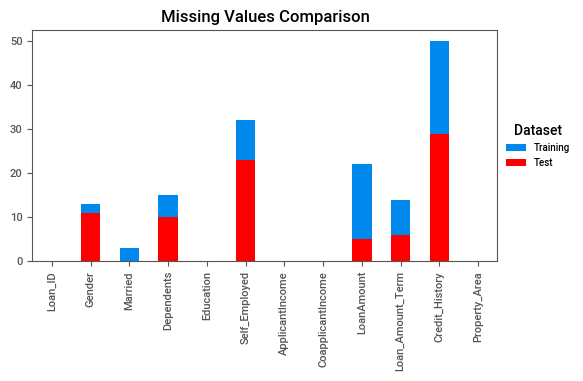

In [196]:
#.sort_values(ascending=True)
train_data.isnull().sum()[train_data.isna().sum()>=0].plot(kind='bar', title='Missing Values Comparison', figsize=(6,3))

test_data.isnull().sum()[test_data.isnull().sum()>=0].plot(kind='bar',figsize=(6,3),color='red')

plt.legend(["Training", "Test"], 
           title='Dataset', 
           prop={'size': 7}, 
           frameon=False, 
           loc='center left', 
           bbox_to_anchor=(1.0, 0.5))
plt.show()

#### Analysis of results obtained:

- There exists no duplicates in either of the datasets, however both datasets has missing values.

## <span style="color:blue"> Question 3:</span>
#### How do the the loan statuses compare i.e. what is the distrubition of each?


In [238]:
#plt.figure(figsize=(6,4))
#sns.countplot(train_data["Loan_Status"])
#plt.title("Distrubition of Loan Status", fontsize=20, fontweight='bold', color='brown')
#plt.show()

print('\033[1m' + "Value Counts for loan status:"+ '\033[0m')
print(train_data["Loan_Status"].value_counts())

print('\033[1m' + "\nNormalized Values:"+ '\033[0m')
print(train_data["Loan_Status"].value_counts(normalize=True))

print('\033[1m' + "\nDifferentiating between gender when it comes to defaulting on loans:"+ '\033[0m')
print(train_data.groupby("Gender")["Loan_Status"].value_counts())

Value Counts for loan status:
Y    422
N    192
Name: Loan_Status, dtype: int64

Normalized Values:
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Differentiating between gender when it comes to defaulting on loans:
Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: Loan_Status, dtype: int64


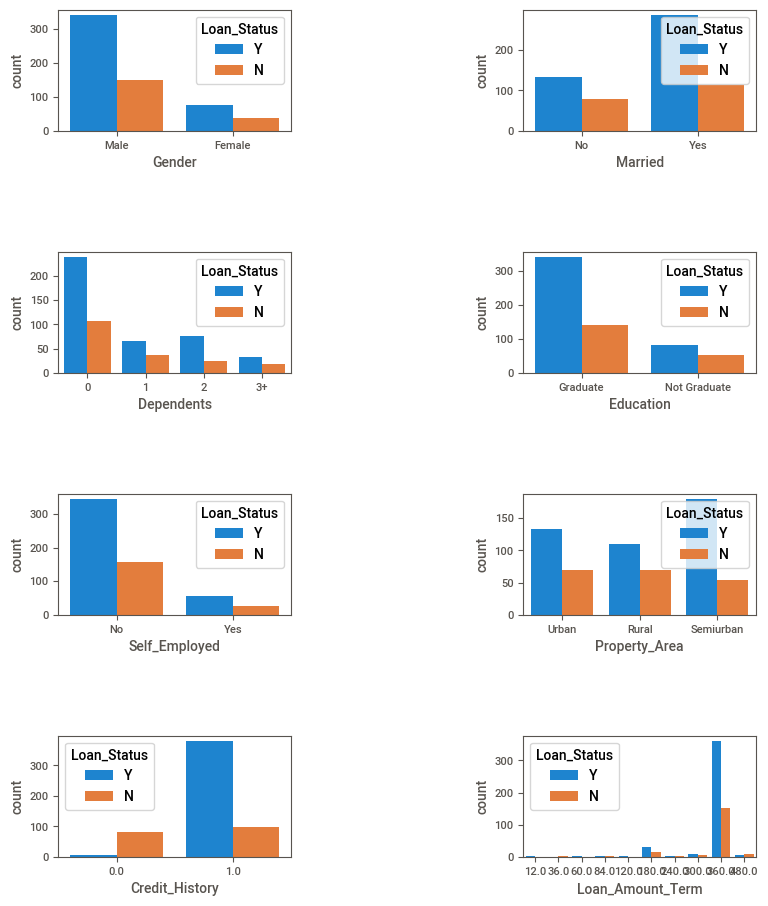

In [223]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

fig,axes = plt.subplots(4,2,figsize=(9,11))
plt.legend(["Y", "N"], title='Loan Status', prop={'size': 7}, frameon=False, loc='right', bbox_to_anchor=(1.0, 0.5))

for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_data,hue='Loan_Status',ax=axes[row,col])
    
plt.subplots_adjust(hspace=1, wspace=1)

#### Analysis of results obtained:

- Overall there exist 422 loans with a Y status and 192 loans with a N status.
\
&nbsp;
- We also see that under gender, men have a higher loan status of Y and N than women. Both genders have a higher Y than N loan status.

## <span style="color:blue"> Question 4:</span>
#### How many of the loan applicants have dependents based on the historical dataset?

In [262]:
print('\033[1m' + "Data Inspection:"+ '\033[0m')
print(train_data[['Loan_ID','Dependents']])

print("\nNow, it's important to note that the Dependents column in the train dataset contains non-numerical values" +
     "\n" + "like '3+' which should be included in the count.")

Data Inspection:
      Loan_ID Dependents
0    LP001002          0
1    LP001003          1
2    LP001005          0
3    LP001006          0
4    LP001008          0
..        ...        ...
609  LP002978          0
610  LP002979         3+
611  LP002983          1
612  LP002984          2
613  LP002990          0

[614 rows x 2 columns]

Now, it's important to note that the Dependents column in the train dataset contains non-numerical values
like '3+' which should be included in the count.


In [281]:
print('\033[1m' + "The distribution of values in the Dependents column:"+ '\033[0m')
print(train_data["Dependents"].value_counts())

print('\033[1m' + "\nThe number of empty cells in the Dependents column:"+ '\033[0m')
print(train_data["Dependents"].isnull().sum())

The distribution of values in the Dependents column:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

The number of empty cells in the Dependents column:
15


In [286]:
(train_data["Dependents"] > '0').sum()

254

#### Analysis of results obtained:

- Thus we see a total of 254 loan applicants have dependents and 15 loan applicants are indetermined as related to dependents per the historical dataset.

## <span style="color:blue"> Question 5:</span>
#### How does the income of those who are employed compare to those who are self-employed based on the historical dataset?

In [287]:
train_data.groupby("Self_Employed")["ApplicantIncome"].describe()

,count,mean,std,min,25%,50%,75%,max
Self_Employed,,,,,,,,
No,500.0,5049.748000,5682.895810,150.0,2824.50,3705.5,5292.75,81000.0
Yes,82.0,7380.817073,5883.564795,674.0,3452.25,5809.0,9348.50,39147.0


#### Analysis of results obtained:

- The average income of individuals who are employed is 5049 which is lower than 7380 which is the average income of those which is self-employed.
\
&nbsp;
- The minimum income is also lower for employed individuals vs those that are self-employed.
\
&nbsp;
- However, the maximum income of individuals who are employed is 81000 more than doubled than for self-employed individuals at 39147.
\
&nbsp;
- It must be noted that the count of individuals employed vs self-employed are heavily skewed towards those not self-employed.

## <span style="color:blue"> Question 6:</span>
#### Are applicants with a credit history more likely to default than those who do not have one?

In [294]:
#plt.figure(figsize=(6,4))
#sns.countplot(train_data["Credit_History"], hue=train_data["Loan_Status"])
#plt.title("Distrubition of Credit History based on Loan Status", fontsize=15, fontweight='bold', color='brown')
#plt.show()

print('\033[1m' + "Count of Individuals with and without a credit history:"+ '\033[0m')
print(train_data["Credit_History"].value_counts())

print('\033[1m' + "\nCredit history vs Loan Status:"+ '\033[0m')
print(train_data.groupby('Credit_History')['Loan_Status'].value_counts())

Count of Individuals with and without a credit history:
1.0    475
0.0     89
Name: Credit_History, dtype: int64

Credit history vs Loan Status:
Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              378
                N               97
Name: Loan_Status, dtype: int64


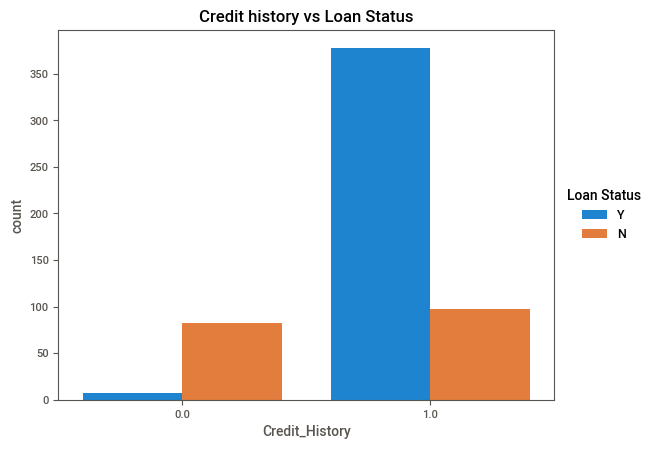

In [320]:
#fig,axes = plt.subplots(4,2,figsize=(9,11))
ax1 = sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = train_data)
ax1.set_title('Credit history vs Loan Status')
plt.legend(["Y", "N"], title='Loan Status', prop={'size': 9}, frameon=False, loc='center', bbox_to_anchor=(1.1, 0.5))

plt.show()

#### Analysis of results obtained:

- We see that yes, applicants with credit histories are more likely to default than those without it.

## <span style="color:blue"> Question 7:</span>
#### Is there a correlation between the applicant's income and the loan amount they applied for?

In [27]:
train_data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [323]:
corr = train_data['ApplicantIncome'].corr(train_data['LoanAmount'])
print ("Correlation between ApplicantIncome and LoanAmount is: ", round(corr, 2))

Correlation between ApplicantIncome and LoanAmount is:  0.57


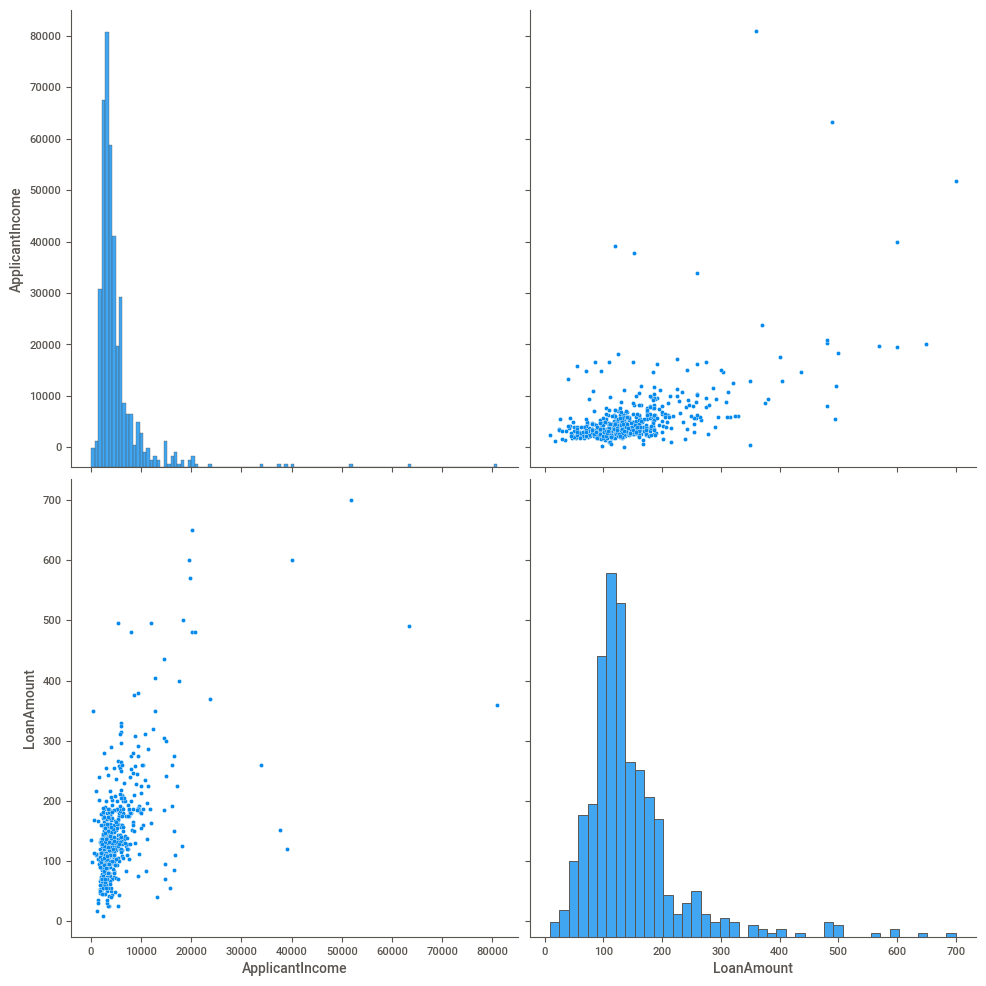

In [339]:
sns.pairplot(train_data, vars=['ApplicantIncome','LoanAmount'], size=5)

#### Analysis of results obtained:

- We see that there exists a positive correlation between the applicant's income and the loan amount they applied for.

# <center> Part Two
---
Run the AutoML section and then fill in code for the traditional ML section for the the omitted cells.

Please note that the notebook you submit must include the analysis you did in Task 2.

In [4]:
#Matrix of features
X = train_data[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

#Convert string(text) to categorical
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')

#label encode target
y = train_data['Loan_Status'].map({'N':0,'Y':1}).astype(int)

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30)
autoML.fit(X_train, y_train)

#predict
predictions_autoML = autoML.predict(X_test)

[WARNING] [2023-05-30 20:37:25,565:Client-AutoML(1):04a9df63-ff19-11ed-87fd-b06088525705] Capping the per_run_time_limit to 29.0 to have time for a least 2 models in each process.


In [13]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.7886178861788617


In [15]:
print(confusion_matrix(predictions_autoML, y_test))

[[19  2]
 [24 78]]


In [19]:
print(classification_report(predictions_autoML, y_test, digits=4))

              precision    recall  f1-score   support

           0     0.4419    0.9048    0.5938        21
           1     0.9750    0.7647    0.8571       102

    accuracy                         0.7886       123
   macro avg     0.7084    0.8347    0.7254       123
weighted avg     0.8840    0.7886    0.8122       123



## Bespoke ML sklearn

### Data Preparation

In [20]:
#Matrix of features
df = train_data[['Gender',
'Married',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History']]

#Imputing the missing values:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)

#Encoding categorical features
df['Gender'] = df['Gender'].map({'Male':0,'Female':1}).astype(int)
df['Married'] = df['Married'].map({'No':0,'Yes':1}).astype(int)
df['Education'] = df['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
df['Credit_History'] = df['Credit_History'].astype(int)

X = df.copy()

#Label encode target
y = train_data['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Model 1: Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

# train
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)

# predict
predictions_clf1 = clf1.predict(X_test)

print('Model Accuracy:', accuracy_score(predictions_clf1, y_test))

Model Accuracy: 0.7886178861788617


In [39]:
print(confusion_matrix(predictions_clf1, y_test))

[[18  1]
 [25 79]]


In [42]:
print(classification_report(predictions_clf1, y_test))

              precision    recall  f1-score   support

           0       0.42      0.95      0.58        19
           1       0.99      0.76      0.86       104

    accuracy                           0.79       123
   macro avg       0.70      0.85      0.72       123
weighted avg       0.90      0.79      0.82       123



#### Model 2 : Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
import sklearn
# train
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

# predict
predictions_clf2 = clf2.predict(X_test)

print('Model Accuracy:', accuracy_score(predictions_clf2, y_test))

Model Accuracy: 0.7642276422764228


In [48]:
print(confusion_matrix(predictions_clf2, y_test))

[[19  3]
 [24 77]]


In [49]:
print(classification_report(predictions_clf2, y_test))

              precision    recall  f1-score   support

           0       0.44      0.86      0.58        22
           1       0.96      0.76      0.85       101

    accuracy                           0.78       123
   macro avg       0.70      0.81      0.72       123
weighted avg       0.87      0.78      0.80       123



#### Model 3 : 

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn import tree
from sklearn.metrics import confusion_matrix

tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)

y_pred = tree_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))


Test Accuracy:  0.7886178861788617


In [62]:
print(confusion_matrix(y_pred, y_test))

[[18  1]
 [25 79]]


In [63]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.42      0.95      0.58        19
           1       0.99      0.76      0.86       104

    accuracy                           0.79       123
   macro avg       0.70      0.85      0.72       123
weighted avg       0.90      0.79      0.82       123

